In [4]:
 import numpy as np

In [5]:
rand=np.random.RandomState(42)

In [6]:
x=rand.randint(100,size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [7]:
[x[3],x[7],x[2]]

[71, 86, 14]

In [8]:
x[[3,7,2]]

array([71, 86, 14])

In [9]:
ind=np.array([[3,7],[4,5]])  #将索引做成单个列表或数组，进行应用来获得多个元素。
x[ind]
#利用这种索引获得的数组，形状与索引数组形状一致，而不是与被索引数组形状一致。如下：

array([[71, 86],
       [60, 20]])

In [10]:
x=np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
row=np.array([0,1,2])
col=np.array([2,1,3])
x[row,col]

array([ 2,  5, 11])

#### 二维索引数组[[row],[col]]=[[0,1,2], [2,1,3]],形成三个索引对,分别为（0,2),(1,1),(2,3),对应3个元素，形成一行三列的数组。

In [12]:
x[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

#### 形成索引对时，如果行列数组形状不一。数组将进行广播运算，遵循广播规则。所以获得（3,3）索引数组，和结果。

# 组合索引

In [13]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
x[2,[2,0,1]]#[]中第一个数代表行，第二个数组代表列。形成三个索引对。（2,2），（2,0），（2,1）

array([10,  8,  9])

In [15]:
x[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [17]:
mask=np.array([1,0,1,0],dtype=bool)#此处必须强调数组类型为bool。
#否则mask将会被当做（3,4）数组被对待，得到不同的结果。如下：

In [18]:
x[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [19]:
mask1=np.array([1,0,1,0])

In [44]:
x[row[:,np.newaxis],mask1]

array([[ 2.35807765,  0.35713769,  2.35807765,  0.35713769],
       [-2.11454898, -0.60511946, -2.11454898, -0.60511946],
       [-0.63828561, -0.37970336, -0.63828561, -0.37970336]])

# 此处不是很懂，希望后续改进

In [21]:
mean=[0,0]

In [23]:
cov=[[1,2],
     [2,5]]

In [25]:
x=rand.multivariate_normal(mean,cov,100)

In [27]:
np.shape(x)

(100, 2)

In [28]:
%matplotlib inline

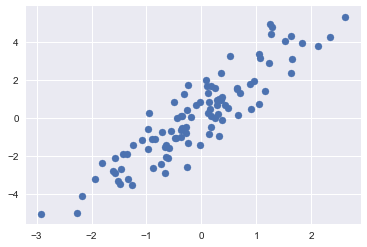

In [32]:
import matplotlib.pyplot as plt
import seaborn;seaborn.set()
plt.scatter(x[:,0],x[:,1]);

In [34]:
indices=np.random.choice(x.shape[0],20,replace=False)

In [39]:
indices,np.shape(indices)

(array([50, 16, 19, 60, 28, 85, 38, 24, 65, 48, 99, 40, 59, 53, 20, 54, 58,
         4, 42, 94]), (20,))

In [41]:
selection=x[indices]
np.shape(selection)

(20, 2)

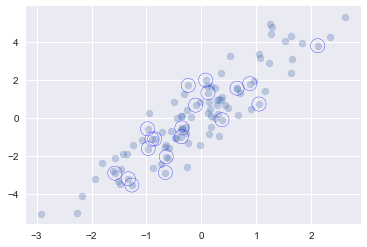

In [45]:
plt.scatter(x[:,0],x[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],facecolor='none',edgecolor='b',s=200)

#### 用花哨的索引修改值

In [48]:
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
i=np.array([2,1,8,4])

In [91]:
x[i]=99  #通过索引数组，修改x中的相应索引上的每个值
x

array([ 0.,  0., 99., 99., 99.,  0.,  0.,  0.,  0.,  0.])

In [92]:
x[i]-=10#通过索引数组给相应位置上的值进行赋值运算。
x

array([ 0.,  0., 89., 89., 89.,  0.,  0.,  0.,  0.,  0.])

In [97]:
x=np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [98]:
x[[0,0]]=[4,6] #当索引数组中有重复值时，可能会产生错误的结果
x

array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [99]:
i=[2,3,3,4,4,4] 
i

[2, 3, 3, 4, 4, 4]

In [100]:
x[i]+=1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [101]:
x=np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [104]:
np.add.at(x,i,1)  #使用np.add.at函数可以实现在索引数组中每个索引处加1，可以重复加1.索引数组中的值可以重复。

x

array([0., 0., 3., 6., 9., 0., 0., 0., 0., 0.])

In [114]:
x=np.array([1,2,3,4,5])
y=np.array([3,3])
np.ndim(x),np.size(x)

(1, 5)

In [112]:
np.multiply.outer(x,y)

array([[ 3,  3],
       [ 6,  6],
       [ 9,  9],
       [12, 12],
       [15, 15]])